In [11]:
import albumentations
import torch
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import time
import albumentations as A
import glob
from torch.utils.data import DataLoader, Dataset
from PIL import Image

In [4]:
image_list = glob.glob("/Users/Banner/Downloads/img/Side-Cutout_Heathered_Shorts/*.jpg")

In [8]:
transform = transforms.Compose([
    transforms.ToPILImage(), 
    transforms.Resize((225, 225)), 
    transforms.CenterCrop((100, 100)), 
    transforms.RandomCrop((80, 80)), 
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.RandomRotation(degrees=(-90, 90)),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [21]:
class PytorchImageDataset(Dataset):
    def __init__(self, image_list, transforms=None):
        self.image_list = image_list
        self.transforms = transforms
    
    def __len__(self):
        return(len(self.image_list))

    def __getitem__(self, i):
        image = plt.imread(self.image_list[i])
        image = Image.fromarray(image).convert('RGB')
        image = np.asarray(image).astype(np.uint8)
        if self.transforms is not None:
            image = self.transforms(image)
        
        return torch.tensor(image, dtype=torch.float)

In [22]:
pytorch_dataset = PytorchImageDataset(image_list=image_list, transforms=transform)
pytorch_dataloader = DataLoader(dataset=pytorch_dataset, batch_size=16, shuffle=True)

In [23]:
def show_img(img):
    plt.figure(figsize=(18, 15))
    img = img / 2 + 0.5
    npimg = img.numpy()
    npimg = np.clip(npimg, 0, 1)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [24]:
data = iter(pytorch_dataloader)
images = data.next()

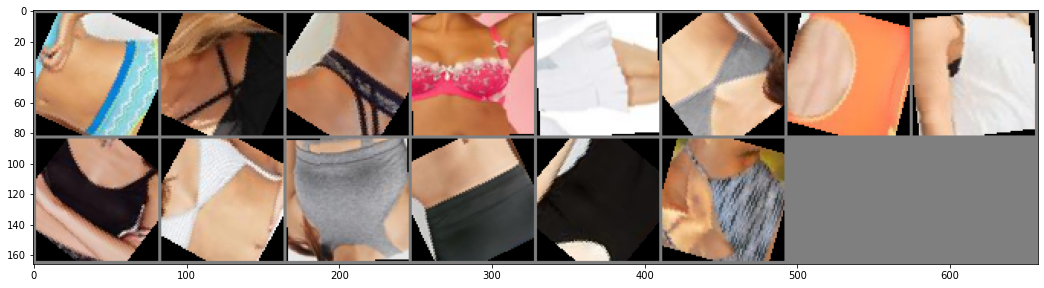

In [26]:
show_img(make_grid(images))

In [27]:
class AlbumentationImageDataSet(Dataset):
    def __init__(self, image_list):
        self.image_list = image_list

        self.aug = A.Compose([
            A.Resize(200, 300), 
            A.CenterCrop(100, 100), 
            A.RandomCrop(80, 80),
            A.HorizontalFlip(p = 0.5), 
            A.Rotate(limit=(-90, 90)), 
            A.VerticalFlip(p=0.5), 
            A.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
    
    def __len__(self):
        return (len(self.image_list))

    
    def __getitem__(self, i):
        image = plt.imread(self.image_list[i])
        image = Image.fromarray(image).convert('RGB')
        image = self.aug(image=np.array(image))['image']
        image = np.transpose(image, (2, 0, 1)).astype(np.float32)

        return torch.tensor(image, dtype=torch.float32)

In [28]:
alb_dataset = AlbumentationImageDataSet(image_list=image_list)
alb_dataloader = DataLoader(alb_dataset, batch_size=32, shuffle=True)

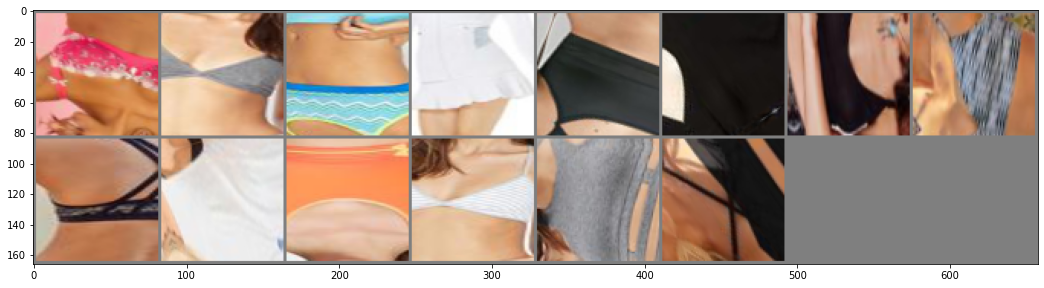

In [29]:
data = iter(alb_dataloader)
images = data.next()

show_img(make_grid(images))